# 입문자를 위한, 파이썬/R 데이터 분석  

]

## Today's mission

- FDR(FinanceDataReader)를 통한 상장종목 수집
- 한국거래소(KRX) 전체 종목 분석
- FDR를 통한 개별 종목 데이터 수집 및 분석 / 과학적 기수법

]


## FDR를 통한 개별 종목 데이터 수집 및 분석

### 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [2]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
#!pip install -U finance-datareader

In [3]:
# FinanceDataReader 를 fdr 별칭으로 가져오기
import FinanceDataReader as fdr

## 개별 종목의 일별 시세 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [4]:
# 삼성전자, 2017년~현재 일별 시세 받아오기
# 삼성전자의 종목 코드 '005930'
df = fdr.DataReader('005930', "2017")#, "2021")
#df.head()
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2024-08-13,76500,76600,75500,76100,10716261,0.007947
2024-08-14,77400,77800,77000,77200,13246168,0.014455
2024-08-16,79400,80200,78700,80200,22061478,0.038860


<Axes: xlabel='Date'>

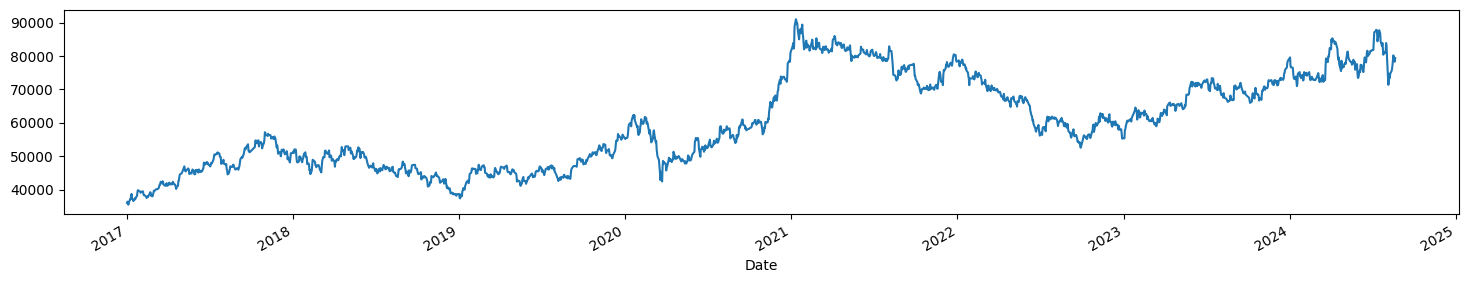

In [5]:
df["Close"].plot(figsize=(18, 3))

## 상장종목 목록 가져오기

In [6]:
# 이전 강의에서 저장해 놓았던 csv 파일로 분석을 합니다.
# colab 사용자의 경우 이미 csv 파일이 지워졌을 수 있기 때문에 파일이 없을 경우 아래 셀에서 다시 load하면 됩니다.
df_krx = pd.read_csv("data/krx.csv")
df_krx.shape

(2828, 17)

In [8]:
# 위 CSV 파일이 로드되지 않아 당황스러우신가요? 그럼 아래 주석을 풀고 다시 KRX 데이터를 받아오세요.
# colab의 경우 일정 시간이 지나면 런타임이 초기화 되기 때문에 다시 로드하면 데이터를 가져올 수 있습니다.
# df_krx = fdr.StockListing('KRX')

## 상장종목 목록 사용하기
* 종목명과 심볼을 찾기 위해 상장종목 목록을 사용합니다.

In [9]:
# DataFrame 에 어떤 데이터가 들어있는 head()로 일부 데이터만 가져와 봅니다.
df_krx[["Code", "Name"]].head()

,Code,Name
0,005930,삼성전자
1,000660,SK하이닉스
2,373220,LG에너지솔루션
3,207940,삼성바이오로직스
4,005380,현대차


In [13]:
# df_krx의 Name column 에서 '하이브'에 해당하는 row를 전부 가져오는데 Name column만 가져와
# list 형태로 index 번호는 빼고 ['하이브'] 만 가져오게 되고 [0]을 통해 list에 있는 string만 가져오게 됩니다.
# 하이브 (series) -> ['하이브'] (list) -> '하이브' (string)
item_name = "하이브"
df_krx.loc[df_krx["Name"] == item_name, "Code"].tolist()[0]

'352820'

In [14]:
df_krx.loc[df_krx["Name"] == item_name, "Code"]

59    352820
Name: Code, dtype: object

In [15]:
# '히트'라는 이름을 가진 상장사가 있는지 확인해 보기
df_krx.loc[df_krx["Name"] == "삼성전자", "Code"].tolist()[0]

'005930'

## 종목명으로 종목 코드를 받아오는 함수 만들기

In [16]:
# 종목명으로 종목코드 받아오는 함수 만들기
# df_krx의 Name column에서 같은 값이 있으면 
# row의 Symbol column의 값을 list로 name_list에 저장하기
# item_code_by_item_name 함수를 만듭니다.

def item_code_by_item_name(item_name):
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Code"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False

In [17]:
item_code_by_item_name("LG전자")

'066570'

In [18]:
# 네이버로 등록된 상장사는 없습니다.
# 잘못 입력된 텍스트에 대해 예외처리를 하는지 확인합니다.
item_code_by_item_name("네이버")

False

In [19]:
# 네이버는 NAVER로 등록되어 있습니다.
item_code_by_item_name("NAVER")

'035420'

In [20]:
# 삼성전자
item_code_by_item_name("삼성전자")

'005930'

In [21]:
# 셀트리온과 카카오게임즈도 확인하여 봅니다.
item_code_by_item_name("셀트리온")

'068270'

In [22]:
item_code_by_item_name("카카오게임즈")

'293490'

In [23]:
fdr.DataReader(item_code_by_item_name("삼성전자"))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-05-02,6200,6530,6120,6280,1446713,NaN
2000-05-03,6240,6260,6090,6180,531786,-0.015924
2000-05-04,6220,6360,6140,6180,522021,0.000000
2000-05-08,6400,6700,6300,6560,1053944,0.061489
2000-05-09,6500,6540,6340,6370,1010990,-0.028963
...,...,...,...,...,...,...
2024-08-13,76500,76600,75500,76100,10716261,0.007947
2024-08-14,77400,77800,77000,77200,13246168,0.014455
2024-08-16,79400,80200,78700,80200,22061478,0.038860


## 종목명으로 일별시세를 받아오는 함수 만들기

In [28]:
# item_code_by_item_name : 종목명으로 종목번호 가져오기
# find_item_list : 종목번호로 해당연도 데이터 가져오기
# find_item_list는 year 값이 없으면 기본으로 2020년 데이터를 선택

def find_item_list(item_name, year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로
    종목의 시세를 수집합니다.
    """
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [29]:
find_item_list("삼성전자", 2017)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2024-08-13,76500,76600,75500,76100,10716261,0.007947
2024-08-14,77400,77800,77000,77200,13246168,0.014455
2024-08-16,79400,80200,78700,80200,22061478,0.038860


In [30]:
# LG화학의 데이터를 가져옵니다.
find_item_list("LG화학")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,321000,321000,313500,314000,139496,-0.011024
2020-01-03,317000,318500,310500,311000,165030,-0.009554
2020-01-06,308000,311000,306500,307000,138154,-0.012862
2020-01-07,306000,313500,305000,311000,133788,0.013029
2020-01-08,306000,307000,301500,302000,225471,-0.028939
...,...,...,...,...,...,...
2024-08-13,289000,292000,283500,288500,149417,-0.005172
2024-08-14,293500,297500,293000,296000,135332,0.025997
2024-08-16,301000,302000,292500,292500,178695,-0.011824


In [31]:
# stock_daily 변수에 담습니다.
stock_daily = find_item_list("삼성전자")
stock_daily

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2024-08-13,76500,76600,75500,76100,10716261,0.007947
2024-08-14,77400,77800,77000,77200,13246168,0.014455
2024-08-16,79400,80200,78700,80200,22061478,0.038860


## 개별종목 시세 시각화
### pandas 의 plot으로 시각화 하기

<Axes: xlabel='Date'>

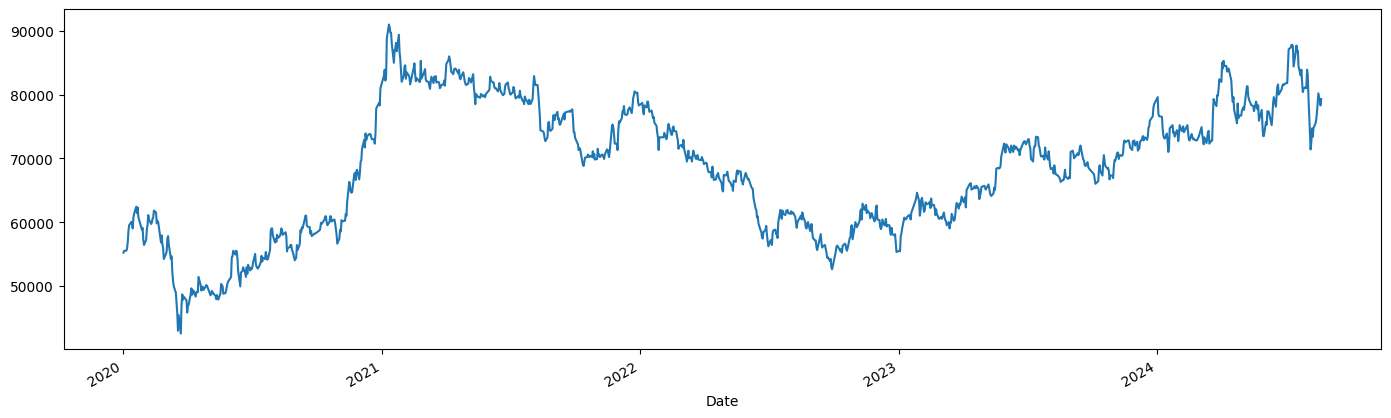

In [32]:
# stock_daily 변수에 할당된 수집된 데이터의 종가 그래프를 그립니다.
stock_daily["Close"].plot(figsize=(17, 5))

<Axes: xlabel='Date'>

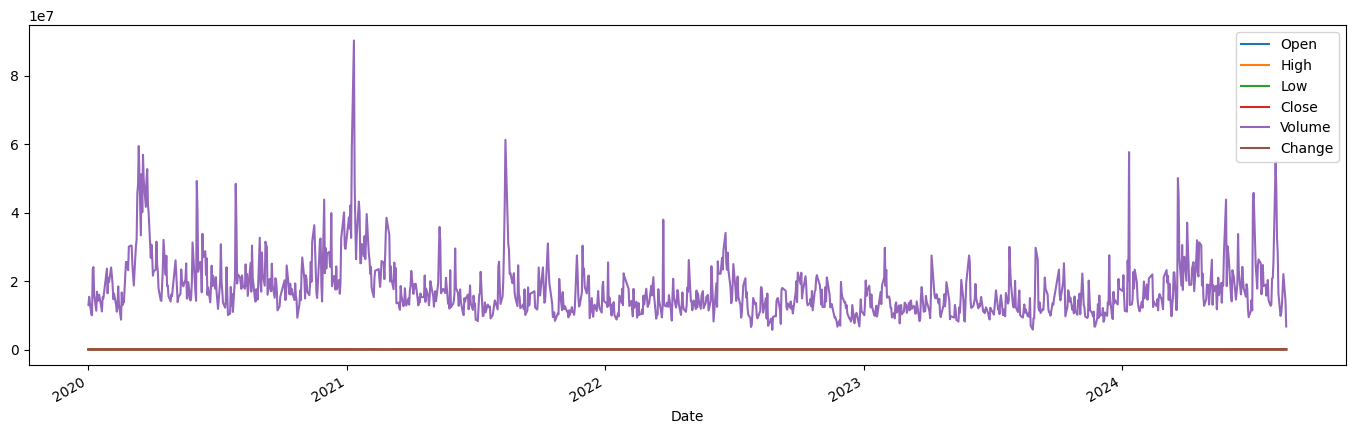

In [33]:
# 전체 데이터프레임을 plot() 으로 시각화 하면 수치 데이터 전체를 선그래프로 그립니다.
stock_daily.plot(figsize=(17, 5))

In [34]:
stock_daily.describe()

,Open,High,Low,Close,Volume,Change
count,1144.000000,1144.000000,1144.000000,1144.000000,1.144000e+03,1144.000000
mean,68504.283217,69097.989510,67854.851399,68440.209790,1.765961e+07,0.000442
std,10101.401417,10141.669082,10038.667175,10080.191387,8.259305e+06,0.016436
min,42600.000000,43550.000000,42300.000000,42500.000000,5.767902e+06,-0.103015
25%,60100.000000,60575.000000,59600.000000,60075.000000,1.241504e+07,-0.009794
50%,69900.000000,70300.000000,69400.000000,69800.000000,1.549675e+07,0.000000
75%,76700.000000,77425.000000,76025.000000,76600.000000,2.060035e+07,0.008527
max,90300.000000,96800.000000,89500.000000,91000.000000,9.030618e+07,0.104706


### 서브플롯 그리기

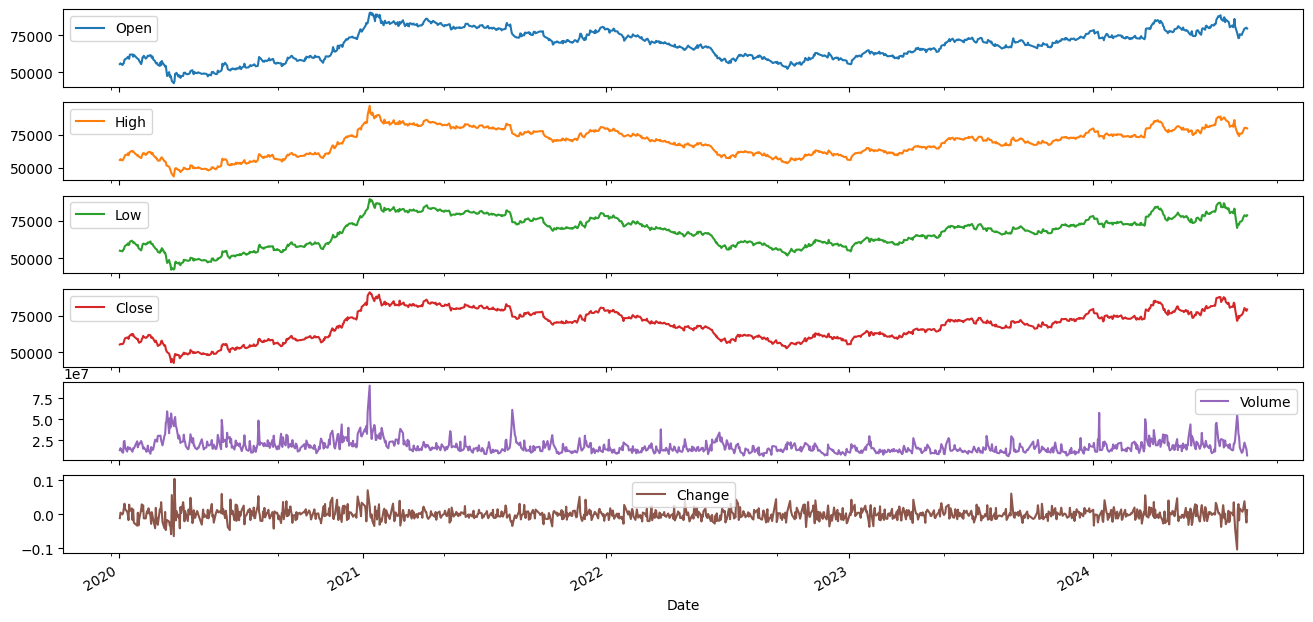

In [35]:
# 수집한 종목의 선그래프를 Pandas 로 그립니다.
# 스케일이 다르기 때문에 subplots를 사용해 그려봅니다.
g = stock_daily.plot(subplots=True, figsize=(16, 8))

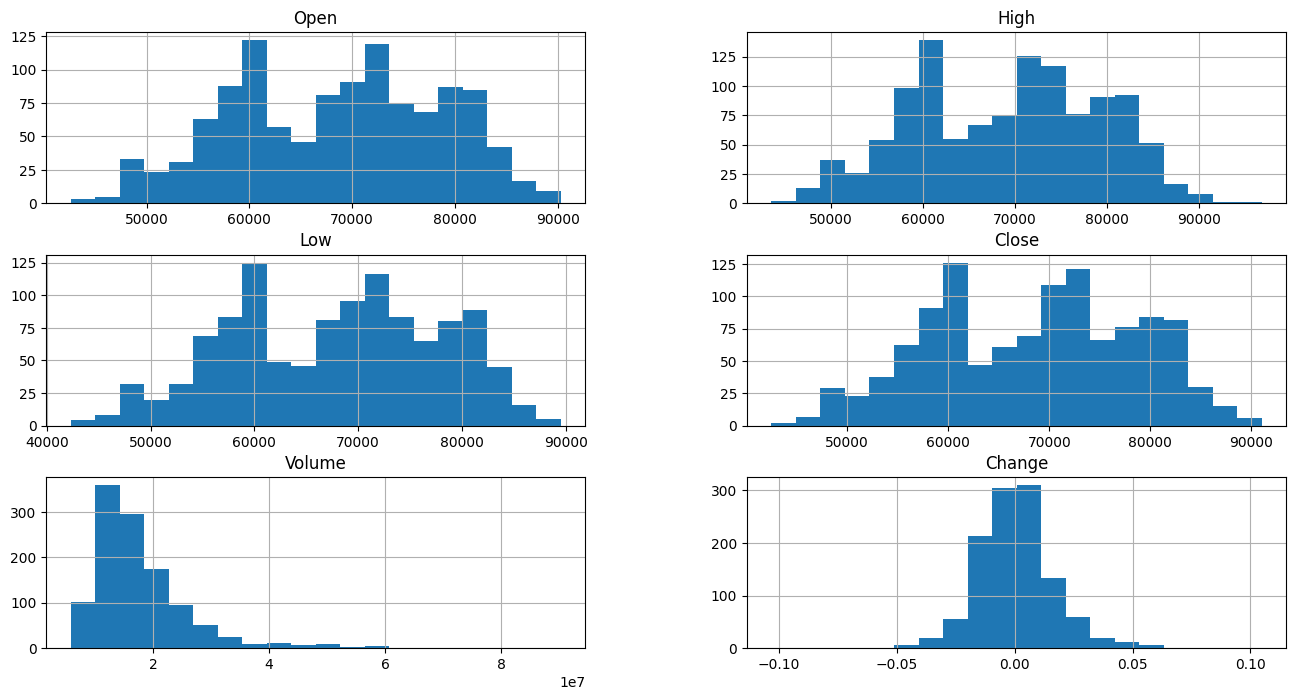

In [36]:
# 히스토그램 그리기
h = stock_daily.hist(figsize=(16, 8), bins=20)

### 2축 그래프 그리기

<Axes: xlabel='Date'>

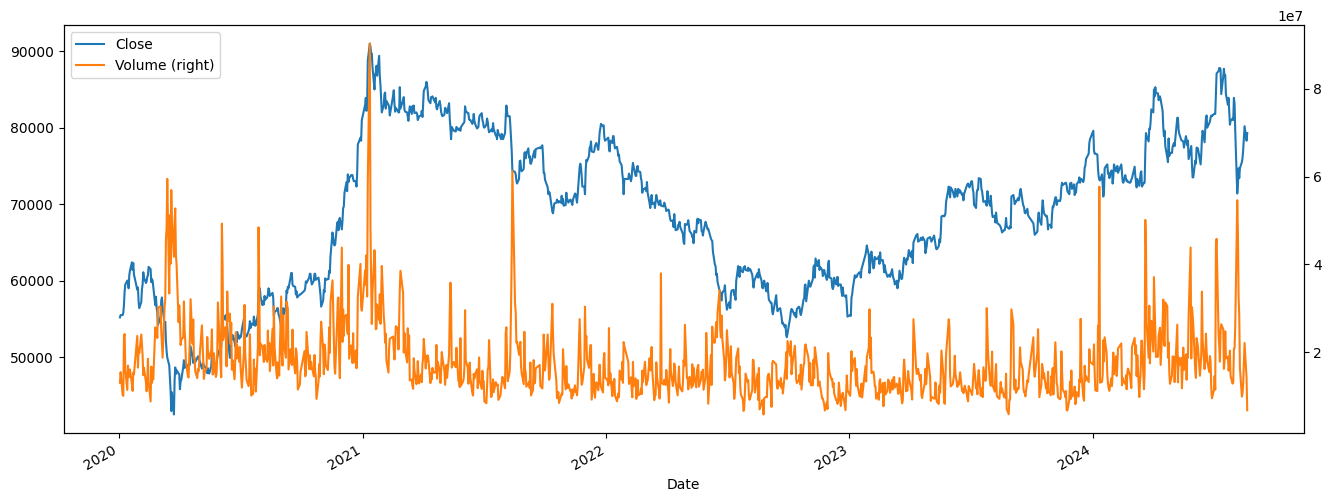

In [39]:
# secondary_y 옵션을 통한 종가와 거래량에 대한 2축 그래프 그리기
stock_daily[["Close", "Volume"]].plot(secondary_y="Volume", figsize=(16, 6))
# ticklabel_format(useOffset=False)

## 과학적 기수법
* 참고 : E notation
[과학적 기수법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B3%BC%ED%95%99%EC%A0%81_%EA%B8%B0%EC%88%98%EB%B2%95)

과학적 기수법, 과학적 표기법(scientific notation, scientific form, standard index form, standard form)은 너무 크거나 너무 작은 숫자들을 십진법으로 편하게 작성하여 표현하는 방법이다.<br> 
과학자, 수학자, 공학자들이 공통적으로 사용하는데, 부분적인 이유는 특정한 산술을 단순화시켜 주기 때문이다. <br>
과학 계산기에서는 "SCI" 디스플레이 모드라는 이름으로 알려져 있다.

In [40]:
format(1e+6, ",")

'1,000,000.0'

In [41]:
format(10**6,",")

'1,000,000'

In [42]:
pd.options.display.float_format = '{:.5f}'.format
stock_daily.describe()

,Open,High,Low,Close,Volume,Change
count,1144.00000,1144.00000,1144.00000,1144.00000,1144.00000,1144.00000
mean,68504.28322,69097.98951,67854.85140,68440.20979,17659610.26923,0.00044
std,10101.40142,10141.66908,10038.66717,10080.19139,8259304.68699,0.01644
min,42600.00000,43550.00000,42300.00000,42500.00000,5767902.00000,-0.10302
25%,60100.00000,60575.00000,59600.00000,60075.00000,12415038.75000,-0.00979
50%,69900.00000,70300.00000,69400.00000,69800.00000,15496750.50000,0.00000
75%,76700.00000,77425.00000,76025.00000,76600.00000,20600354.25000,0.00853
max,90300.00000,96800.00000,89500.00000,91000.00000,90306177.00000,0.10471


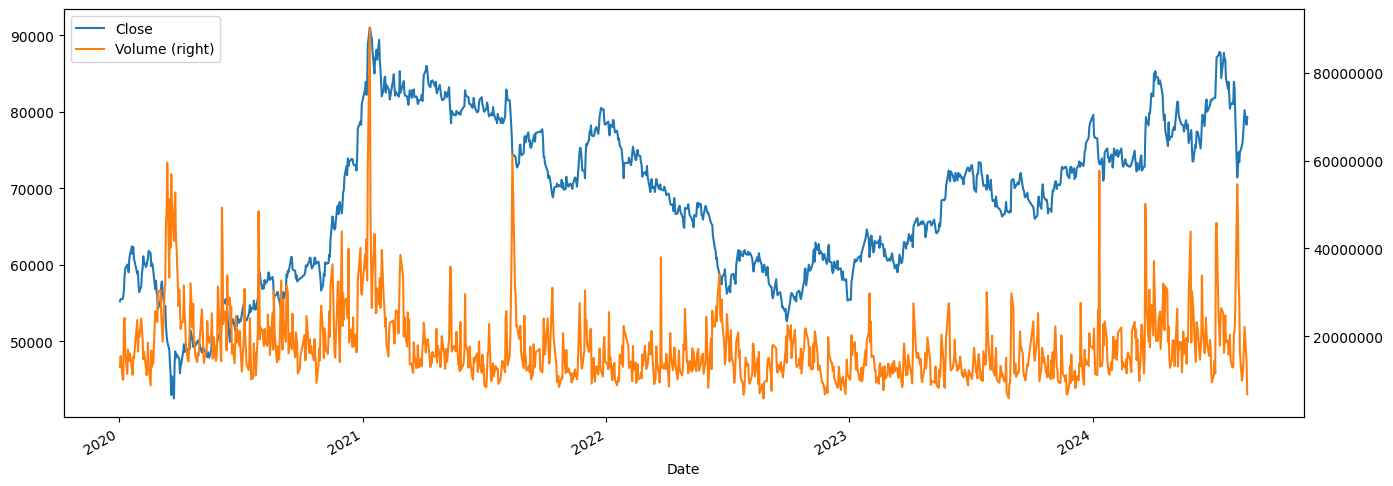

In [43]:
import matplotlib.pyplot as plt
stock_daily[["Close", "Volume"]].plot(secondary_y="Volume", figsize=(16, 6))
#ax.ticklabel_format(useOffset=False, style='plain')   # old with error
plt.ticklabel_format(style='plain', axis='y')          # modified